In [14]:
# install.packages("tripack") 
# install.packages("rjson") 


The downloaded binary packages are in
	/var/folders/59/phgwmyk563s3dw33m2t84qkw0000gn/T//RtmpgbrCH8/downloaded_packages


In [9]:
library(rjson)
library(igraph)
library(data.table)
library(tripack)

In [10]:
json_data <- fromJSON(paste(readLines("san_francisco_censustracts.json"), collapse=""))
ver_attr <- data.frame(matrix(ncol = 4, nrow = 0))
x <- c("id", "name", "x_coor", "y_coor")
colnames(ver_attr) <- x
length(json_data$features)
for (i in (1:length(json_data$features))){
    coor_len <- length(json_data$features[[i]]$geometry$coordinates[[1]][[1]])
    latitude <- 0
    longitude <- 0
    for (j in (1:coor_len)){
        latitude <- latitude + json_data$features[[i]]$geometry$coordinates[[1]][[1]][[j]][1]
        longitude <- longitude + json_data$features[[i]]$geometry$coordinates[[1]][[1]][[j]][2]
    }
    x <- latitude / coor_len
    y <- longitude / coor_len
    id <- json_data$features[[i]]$properties$MOVEMENT_ID
    name <- json_data$features[[i]]$properties$DISPLAY_NAME
    ver_attr[nrow(ver_attr) + 1,] = list(id, name, x, y)
}
nrow(ver_attr)
head(ver_attr)
print(ver_attr[1,]$y_coor)

Warning message in readLines("san_francisco_censustracts.json"):
“incomplete final line found on 'san_francisco_censustracts.json'”

[1] 2710

[1] 2710

id,name,x_coor,y_coor
1,"Sargent Creek, San Ardo",-120.7887,36.07163
2,"400 Northumberland Avenue, Redwood Oaks, Redwood City",-122.2194,37.46958
3,"18300 Sutter Boulevard, Morgan Hill",-121.6602,37.15048
4,"2700 Stoughton Way, Sheffield, Sacramento",-121.3428,38.57307
5,"3200 Huntsman Drive, Rosemont Park, Sacramento",-121.3617,38.55443
6,"100 Carlsbad Circle, Vacaville",-121.9484,38.36665


[1] 36.07163


In [11]:
id_sf = 2607
id_sc = 1968
print(ver_attr[2607,])
print(ver_attr[1968,])

       id                       name   x_coor   y_coor
2607 2607 100 Campus Drive, Stanford -122.176 37.42969
       id                         name    x_coor   y_coor
1968 1968 700 Meder Street, Santa Cruz -122.0646 36.97417


In [12]:
ver_attr.triangles<-tri.mesh(ver_attr$x_coor, ver_attr$y_coor)

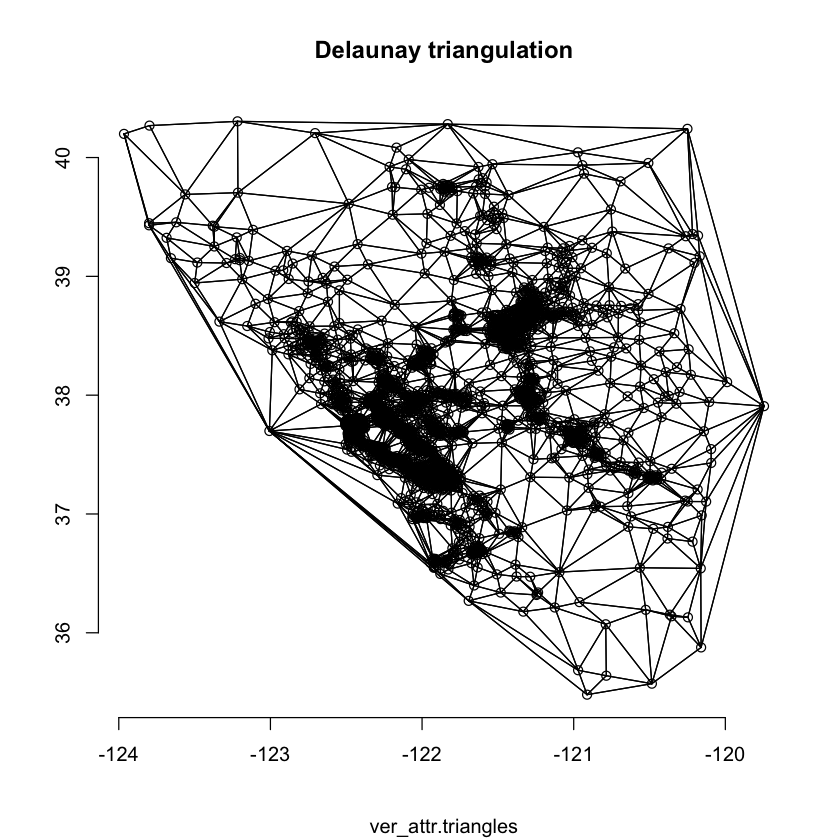

In [13]:
plot(ver_attr.triangles)
axis(1)
axis(2)

In [1]:
summary(ver_attr.triangles)

ERROR: Error in summary(ver_attr.triangles): object 'ver_attr.triangles' not found


## Q12

In [14]:
neiblist <- neighbours(ver_attr.triangles)

2607 2607 100 Campus Drive, Stanford -122.176 37.42969
       id                         name    x_coor   y_coor
1968 1968 700 Meder Street, Santa Cruz -122.0646 36.97417

In [15]:
names(neiblist) <- ver_attr$id 

In [16]:
euc_dist <- as.matrix(dist(cbind(x=ver_attr.triangles$x, y=ver_attr.triangles$y)))

In [41]:
system.time(edge_list <- fread("san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv"))
nrow(edge_list)
edge_list <- edge_list[which(edge_list[,"month"]==12)]
nrow(edge_list)
head(edge_list)

edge_list <- edge_list[,c("sourceid","dstid","mean_travel_time"), drop = FALSE]
head(edge_list)
colnames(edge_list)[3] <- "weight"
head(edge_list)

   user  system elapsed 
  0.337   0.063   0.126 

[1] 1605957

[1] 538998

sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
1938,1952,12,596.69,327.27,530.23,1.60
1747,629,12,1454.81,536.38,1378.06,1.37
1872,1919,12,1227.01,391.90,1169.76,1.36
1871,1929,12,1005.54,308.34,965.06,1.32
81,2319,12,474.53,198.14,446.37,1.41
1873,1909,12,1164.51,461.02,1092.71,1.41


sourceid,dstid,mean_travel_time
1938,1952,596.69
1747,629,1454.81
1872,1919,1227.01
1871,1929,1005.54
81,2319,474.53
1873,1909,1164.51


sourceid,dstid,weight
1938,1952,596.69
1747,629,1454.81
1872,1919,1227.01
1871,1929,1005.54
81,2319,474.53
1873,1909,1164.51


In [42]:
graph <- graph.data.frame(edge_list, directed=F)
graph <- simplify(graph, remove.multiple = TRUE, remove.loops = TRUE,
  edge.attr.comb = list(weight="mean", "ignore"))
E(graph)
V(graph)
graph <- set.vertex.attribute(graph, name="location", value=list(c(0,0)))
graph <- set.vertex.attribute(graph, name="Display_name", value="b")

+ 311812/311812 edges from 11d204f (vertex names):
 [1] 1938--1747 1938--1872 1938--1873 1938--232  1938--1891 1938--550 
 [7] 1938--1721 1938--176  1938--74   1938--1755 1938--1946 1938--1729
[13] 1938--722  1938--234  1938--251  1938--544  1938--1856 1938--338 
[19] 1938--175  1938--687  1938--818  1938--695  1938--682  1938--817 
[25] 1938--153  1938--272  1938--1455 1938--876  1938--131  1938--2147
[31] 1938--396  1938--2146 1938--2155 1938--52   1938--1269 1938--123 
[37] 1938--155  1938--235  1938--702  1938--1284 1938--1925 1938--2613
[43] 1938--1907 1938--1952 1938--1933 1938--957  1938--1906 1938--2513
[49] 1938--2515 1938--1870 1938--1928 1938--1923 1938--1597 1938--104 
[55] 1938--2488 1938--1893 1938--1875 1938--184  1938--65   1938--2169
+ ... omitted several edges

+ 1887/1887 vertices, named, from 11d204f:
   [1] 1938 1747 1872 1871 81   1873 232  1891 2423 650  680  542  604  660 
  [15] 1329 2421 1736 2021 550  1721 1700 176  536  74   288  169  99   1755
  [29] 646  2315 2322 2307 1390 641  1946 2357 1454 1729 2355 722  612  98  
  [43] 1074 1058 614  151  2341 1056 1745 1438 1473 1469 234  1098 1457 289 
  [57] 222  1059 1448 610  1097 1458 1484 315  1727 251  388  1748 544  1025
  [71] 1856 1726 1296 1749 338  1066 613  175  535  1451 2700 687  809  387 
  [85] 859  1739 1808 818  1838 738  695  685  682  817  627  339  605  153 
  [99] 609  647  645  272  284  1455 397  1409 876  1437 131  2210 347  1759
 [113] 2147 1359 2187 152  2113 396  2146 2155 2132 277  1258 369  52   2110
 [127] 1269 2157 1504 1456 1526 2111 123  1259 446  445  1514 1170 478  2401
+ ... omitted several vertices

In [75]:
time = distances(graph)

In [224]:
#id1, id2, dis, flow
el <- matrix(0, nrow = 0, ncol = 4)
for(x in c(1:length(neiblist))){
    for(y in c(1:length(neiblist[[x]]))){
        nb_id = neiblist[[x]][y]
        dis = euc_dist[x, nb_id]*69
        if(x %in% V(graph)$name && nb_id %in% V(graph)$name){
            t = time[which(V(graph)$name == x), which(V(graph)$name == nb_id)] 
            speed = dis/t
            flow = 2*(3600/((0.003+2*speed)/speed))
        }
        else{
            print(x)
            print(nb_id)
            flow = 0
        }   
        el <- rbind(el, c(x, nb_id, dis, flow))
    }
}

[1] 1
[1] 190
[1] 1
[1] 673
[1] 1
[1] 674
[1] 1
[1] 790
[1] 1
[1] 848
[1] 1
[1] 1428
[1] 4
[1] 5
[1] 4
[1] 1413
[1] 4
[1] 1415
[1] 4
[1] 1418
[1] 4
[1] 1419
[1] 4
[1] 1817
[1] 4
[1] 1818
[1] 5
[1] 4
[1] 5
[1] 258
[1] 5
[1] 1419
[1] 5
[1] 1420
[1] 10
[1] 375
[1] 10
[1] 579
[1] 10
[1] 2166
[1] 10
[1] 2690
[1] 12
[1] 494
[1] 13
[1] 70
[1] 13
[1] 654
[1] 13
[1] 655
[1] 13
[1] 966
[1] 13
[1] 1166
[1] 13
[1] 1179
[1] 15
[1] 1162
[1] 15
[1] 1163
[1] 15
[1] 1169
[1] 15
[1] 2017
[1] 15
[1] 2610
[1] 15
[1] 2684
[1] 18
[1] 340
[1] 18
[1] 1166
[1] 18
[1] 1179
[1] 18
[1] 1195
[1] 18
[1] 2278
[1] 18
[1] 2600
[1] 19
[1] 50
[1] 19
[1] 709
[1] 19
[1] 1812
[1] 19
[1] 1828
[1] 19
[1] 1859
[1] 19
[1] 2292
[1] 19
[1] 2609
[1] 19
[1] 2680
[1] 22
[1] 673
[1] 22
[1] 674
[1] 22
[1] 792
[1] 22
[1] 1428
[1] 29
[1] 989
[1] 29
[1] 994
[1] 29
[1] 1497
[1] 29
[1] 1506
[1] 32
[1] 33
[1] 32
[1] 407
[1] 32
[1] 1797
[1] 32
[1] 1798
[1] 32
[1] 2445
[1] 33
[1] 32
[1] 33
[1] 213
[1] 33
[1] 343
[1] 33
[1] 1362
[1] 33
[1] 17

In [84]:
distances(graph)

,1938,1747,1872,1871,81,1873,232,1891,2423,650,⋯,2645,1313,2493,1162,36,2549,2557,231,1991,806
1938,0.000,2413.870,1124.500,1282.775,3525.965,318.250,1613.575,802.395,2251.225,3215.240,⋯,4099.425,7731.390,4294.455,3559.365,3930.185,4686.575,2333.300,3320.415,5770.725,5887.855
1747,2413.870,0.000,2486.180,2512.405,1350.745,2424.585,917.785,1914.145,1528.320,1110.275,⋯,4441.365,6731.195,4636.395,4912.000,4272.125,5028.515,3685.935,3662.355,5015.670,5198.385
1872,1124.500,2486.180,0.000,226.750,3600.905,915.520,1686.345,1456.175,2997.985,3334.945,⋯,4844.230,8478.150,5039.260,2674.165,4674.990,5431.380,1448.100,4065.220,6490.285,6604.400
1871,1282.775,2512.405,226.750,0.000,3814.545,1102.770,1716.450,1508.615,3145.385,3561.695,⋯,4994.990,8675.840,5190.020,2751.495,4825.750,5582.140,1525.430,4215.980,6636.110,6749.760
81,3525.965,1350.745,3600.905,3814.545,0.000,3674.540,2233.275,3177.600,2385.505,586.085,⋯,5024.905,5601.070,5240.675,6236.465,5213.765,5989.365,5010.400,4637.010,4428.955,4601.520
1873,318.250,2424.585,915.520,1102.770,3674.540,0.000,1623.505,732.350,2304.295,3384.830,⋯,4152.495,7784.460,4347.525,3241.115,3983.255,4739.645,2015.050,3373.485,5823.795,5940.925
232,1613.575,917.785,1686.345,1716.450,2233.275,1623.505,0.000,1043.100,1846.045,1977.875,⋯,3879.545,7482.680,4074.575,4110.700,3710.305,4466.695,2884.635,3100.535,5522.295,5639.425
1891,802.395,1914.145,1456.175,1508.615,3177.600,732.350,1043.100,0.000,1996.595,2848.745,⋯,3853.420,7580.155,4048.450,3807.100,3684.180,4440.570,2581.035,3074.410,5544.955,5690.230
2423,2251.225,1528.320,2997.985,3145.385,2385.505,2304.295,1846.045,1996.595,0.000,1954.710,⋯,3160.085,5981.590,3355.115,5419.085,2990.845,3747.235,4193.020,2381.075,4020.925,4138.055
650,3215.240,1110.275,3334.945,3561.695,586.085,3384.830,1977.875,2848.745,1954.710,0.000,⋯,4466.595,5656.805,4682.365,6009.110,4648.450,5424.050,4783.045,4062.785,3905.395,4088.110


In [223]:
time[which(V(graph)$name==2138), which(V(graph)$name==2)]

[1] Inf

In [207]:
el[,1]=as.character(el[,1]) #Because the vertex IDs in this dataset are numbers, we make sure igraph knows these should be treated as characters. Otherwise, it'll create problems (see page on data import)
el[,2]=as.character(el[,2])
el=as.matrix(el) #igraph needs the edgelist to be in matrix format
g=graph.edgelist(el[,1:2]) #We first greate a network from the first two columns, which has the list of vertices
E(g)$weight=as.numeric(el[,3]) #We then add the edge weights to this network by assigning an edge attribute called 'weight'.
E(g)$capacity=as.numeric(el[,4])

In [208]:
vcount(g)
ecount(g)

[1] 2710

[1] 16230

In [209]:
V(g)$name

[1] "1"    "190"  "673"  "674"  "790"  "848"  "1428" "2"    "395"  "818" 
  [11] "1470" "1727" "1733" "2352" "3"    "567"  "1398" "1407" "1408" "1409"
  [21] "2151" "4"    "5"    "1413" "1415" "1418" "1419" "1817" "1818" "258" 
  [31] "729"  "1420" "6"    "366"  "752"  "1219" "2252" "2389" "7"    "25"  
  [41] "439"  "1204" "1205" "1982" "2336" "8"    "138"  "1224" "1225" "1226"
  [51] "2001" "9"    "20"   "643"  "644"  "905"  "963"  "1245" "1674" "10"  
  [61] "375"  "579"  "2076" "2166" "2690" "11"   "623"  "892"  "1628" "1632"
  [71] "1633" "2480" "12"   "494"  "2008" "2010" "2026" "2078" "2159" "13"  
  [81] "70"   "654"  "655"  "966"  "1166" "1179" "1194" "14"   "1159" "1160"
  [91] "2100" "2101" "2257" "15"   "1162" "1163" "1169" "2017" "2610" "2684"
 [101] "16"   "786"  "1172" "2111" "2112" "2258" "17"   "776"  "897"  "1170"
 [111] "1171" "2110" "2259" "2479" "18"   "340"  "1195" "2278" "2600" "19"  
 [121] "50"   "709"  "1812" "1828" "1859" "2292" "2609" "2680" "79"   "434" 
 [131] "21"   "906"  "964"  "1247" "1258" "1677" "2606" "22"   "792"  "23"  
 [141] "24"   "270"  "573"  "1213" "1993" "40"   "1214" "1994" "2541" "753" 
 [151] "1217" "2542" "26"   "75"   "755"  "1997" "1998" "2156" "2158" "27"  
 [161] "142"  "764"  "2061" "2469" "2545" "28"   "767"  "768"  "2011" "2164"
 [171] "29"   "989"  "994"  "1497" "1506" "30"   "422"  "599"  "600"  "939" 
 [181] "1060" "1082" "1083" "31"   "481"  "628"  "937"  "1069" "1658" "32"  
 [191] "33"   "407"  "1797" "1798" "2445" "213"  "343"  "1362" "2696" "34"  
 [201] "121"  "261"  "913"  "35"   "879"  "1380" "1712" "2501" "2707" "36"  
 [211] "114"  "1954" "2328" "37"   "1337" "1357" "1825" "2222" "2223" "38"  
 [221] "582"  "1444" "1719" "1965" "2402" "2516" "2527" "39"   "253"  "275" 
 [231] "421"  "571"  "2027" "401"  "572"  "41"   "334"  "489"  "1605" "1606"
 [241] "1615" "42"   "622"  "959"  "1027" "1575" "2162" "2531" "43"   "56"  
 [251] "101"  "191"  "954"  "44"   "78"   "965"  "1271" "1944" "2465" "2643"
 [261] "45"   "803"  "1593" "2035" "2075" "2547" "2638" "2664" "46"   "323" 
 [271] "1068" "2632" "47"   "1067" "1520" "1521" "1543" "1544" "2220" "48"  
 [281] "689"  "694"  "1133" "1368" "1878" "1880" "49"   "163"  "705"  "706" 
 [291] "1839" "1351" "1394" "1865" "51"   "267"  "1382" "1393" "1959" "2579"
 [301] "52"   "552"  "715"  "1254" "1274" "1886" "2153" "53"   "68"   "1141"
 [311] "2091" "2092" "2267" "2661" "54"   "383"  "992"  "993"  "1002" "1569"
 [321] "2331" "2410" "55"   "57"   "102"  "1651" "2201" "2539" "2612" "291" 
 [331] "1114" "1652" "1653" "2418" "2420" "479"  "627"  "1051" "2209" "58"  
 [341] "194"  "283"  "456"  "464"  "1512" "2212" "2213" "59"   "60"   "61"  
 [351] "290"  "435"  "1473" "1553" "2686" "216"  "958"  "1555" "1556" "1107"
 [361] "1567" "62"   "63"   "105"  "1562" "2355" "2592" "2665" "219"  "326" 
 [371] "2395" "64"   "104"  "472"  "1563" "2157" "2533" "65"   "325"  "889" 
 [381] "1557" "2307" "66"   "195"  "1287" "1564" "1565" "1566" "1909" "2396"
 [391] "67"   "293"  "402"  "509"  "899"  "1901" "2286" "845"  "2143" "2572"
 [401] "69"   "160"  "787"  "884"  "2123" "2269" "1165" "1663" "1684" "71"  
 [411] "871"  "1167" "1175" "1176" "1665" "1666" "2698" "72"   "1196" "1197"
 [421] "1765" "1767" "2560" "2710" "73"   "1201" "1203" "2588" "2589" "74"  
 [431] "131"  "176"  "300"  "917"  "1236" "1907" "2407" "834"  "1223" "76"  
 [441] "756"  "922"  "2002" "77"   "696"  "820"  "936"  "1922" "302"  "1780"
 [451] "2629" "165"  "641"  "1688" "80"   "445"  "867"  "907"  "1260" "1276"
 [461] "81"   "649"  "659"  "1295" "1701" "1702" "2318" "82"   "651"  "1703"
 [471] "1704" "1781" "2673" "83"   "777"  "941"  "2380" "2546" "84"   "670" 
 [481] "1353" "1791" "2325" "2674" "85"   "259"  "527"  "1328" "1792" "1799"
 [491] "86"   "87"   "346"  "562"  "830"  "2305" "741"  "927"  "2155" "88"  
 [501] "569"  "1399" "1966" "89"   "239"  "252"  "268"  "420"  "1425" "1967"
 [511] "1969" "2659" "90"   "409"  "1450" "1451" "1741" "2503" "91"   "119" 

In [211]:
el

1,190,20.0404563692547,0
1,673,29.8688791265135,0
1,674,40.37718160288,0
1,790,17.5630739810755,0
1,848,25.1600098587473,0
1,1428,29.5092889631171,0
2,395,1.1498741530346,2803.73691148486
2,818,1.06057409764706,2549.82881954007
2,1470,0.461123295564846,2649.11553123046
2,1727,0.641892724869919,2572.70136662406
2,1733,1.70926114151753,2879.76114321396


In [212]:
max_flow(g, source=V(g)[which(V(g)$name == id_sf)], V(g)[which(V(g)$name == id_sc)])

$value
[1] 15014.96

$flow
    [1] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
    [6] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [11] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [16] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [21] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [26] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [31] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [36] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [41] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [46] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [51] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [56] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [61] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [66] 0.000000e+00 0.0

In [214]:
max_flow(g, source=V(g)[8], V(g)[52])

$value
[1] 14452.36

$flow
    [1] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
    [6] 0.000000e+00 1.018645e+03 2.549829e+03 2.649116e+03 2.572701e+03
   [11] 2.879761e+03 2.782312e+03 0.000000e+00 0.000000e+00 0.000000e+00
   [16] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [21] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [26] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [31] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [36] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [41] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [46] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [51] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [56] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [61] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [66] 0.000000e+00 0.0

In [216]:
distances(g, 8, 52)

,9
2,26.79928


In [217]:
max_flow(g, source=V(g)[8], V(g)[52])

$value
[1] 14452.36

$flow
    [1] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
    [6] 0.000000e+00 1.018645e+03 2.549829e+03 2.649116e+03 2.572701e+03
   [11] 2.879761e+03 2.782312e+03 0.000000e+00 0.000000e+00 0.000000e+00
   [16] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [21] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [26] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [31] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [36] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [41] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [46] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [51] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [56] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [61] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [66] 0.000000e+00 0.0

In [218]:
edge_connectivity(g, which(V(g)$name == id_sf), which(V(g)$name == id_sc))

[1] 5

In [226]:
edge_disjoint_paths(g, which(V(g)$name == id_sf), which(V(g)$name == id_sc))

[1] 5

In [227]:
g2 <- barabasi.game(100, m=5)
edge_connectivity(g2, 100, 1)
edge_disjoint_paths(g2, 100, 1)


[1] 5

[1] 5

In [172]:
degree(g)[which(V(g)$name == id_sf)]

2607 
   6

In [187]:
g2 <- induced_subgraph(g, c(which(V(g)$name == id_sf), which(V(g)$name == id_sc)))

In [180]:
sf = which(V(g)$name == id_sf)

[1] 2653

In [120]:
sf = which(V(graph)$name == id_sf)

In [122]:
sc = which(V(graph)$name == id_sc)

In [124]:
distances(graph, v = sf, to = sc)

,1968
2607,3341.555


In [ ]:
a = all_simple_paths(g, which(V(g)$name == id_sf, which(V(g)$name == id_sc)))

In [ ]:
for()

In [248]:
gg <- make_ring(10)
a = all_simple_paths(gg, 1, 5)

[[1]]
+ 3/10 vertices, from db37af0:
[1] 1 2 3

[[2]]
+ 5/10 vertices, from db37af0:
[1] 1 2 3 4 5

[[3]]
+ 7/10 vertices, from db37af0:
[1]  1 10  9  8  7  6  5

[[4]]
+ 9/10 vertices, from db37af0:
[1]  1 10  9  8  7  6  5  4  3


In [254]:
a

[[1]]
+ 5/10 vertices, from db37af0:
[1] 1 2 3 4 5

[[2]]
+ 7/10 vertices, from db37af0:
[1]  1 10  9  8  7  6  5


In [256]:
a[[1]][2]

+ 1/10 vertex, from db37af0:
[1] 2

In [243]:
ig = induced_subgraph(gg, a)

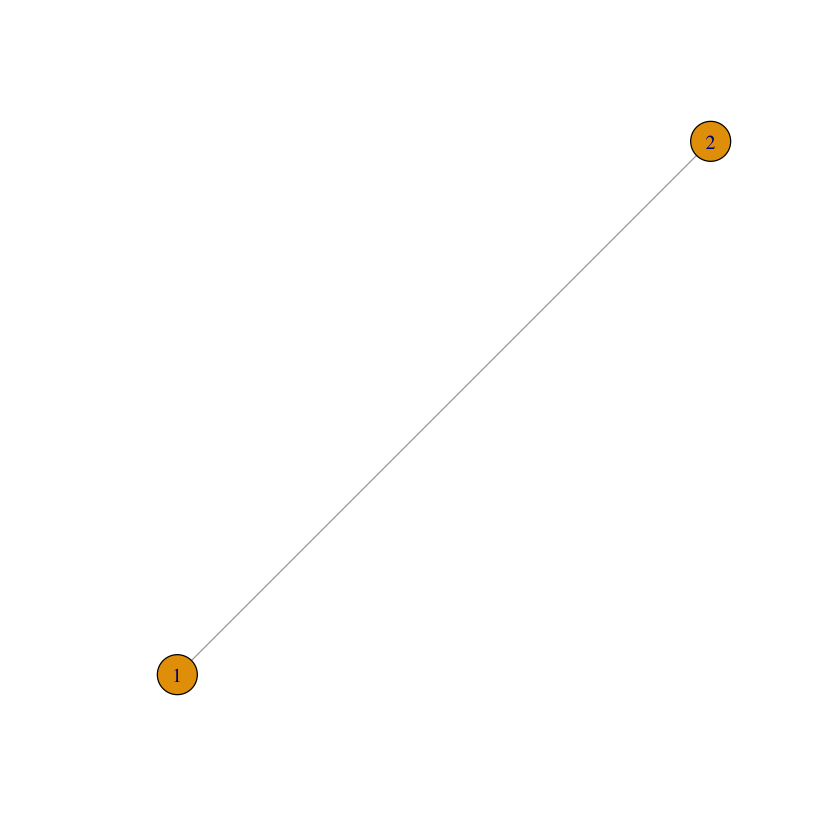

In [244]:
plot(ig)